<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
        <h1>Part 1</h1>
        <br>
        <br>
        <strong>This tutorial follows the PANDAS Tutorials That you can find here : http://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html  </strong><a href="http://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html" target="_blank"></a>
	  </center>	
    <!-- Pandas Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>

**Create Data** - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.  
**Get Data** - We will learn how to read in the text file. The data consist of baby names and the number of baby names born in the year 1880.  
**Prepare Data** - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.  
**Analyze Data** - We will simply find the most popular name in a specific year.  
**Present Data** - Through tabular data and a graph, clearly show the end user what is the most popular name in a specific year.       

> The ***pandas*** library is used for all the data analysis excluding a small piece of the data presentation section. The ***matplotlib*** library will only be needed for the data presentation section. Importing the libraries is the first step we will take in the lesson.

In [5]:
# Import all libraries needed for the tutorial

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline
#%matplotlib

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#from IPython.display import display

In [6]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.11 |Anaconda custom (x86_64)| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.20.1
Matplotlib version 1.5.1


<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# Create Data  
The data set will consist of 5 names and the number of births recorded for that year (1980).

In [7]:
# Name of some of my friends
names = ['Joey','Chandler','Monica','Phoebe','Ross', 'Rachel']
births = [633, 955, 477, 938, 573,402]

To merge these two lists together we will use the ***zip*** function.

In [ ]:
#LOOKING AT DOCUMENTATION OF ZIP (OF COURSE YOU CAN LOOK UP ONLINE)
zip?

In [8]:
BabyDataSet = list(zip(names,births))#list(zip()) : Python 3 
print(BabyDataSet)

[('Joey', 633), ('Chandler', 955), ('Monica', 477), ('Phoebe', 938), ('Ross', 573), ('Rachel', 402)]


<hr style="height:3px;border:none;color:#333;background-color:#333;" />

We have created the data set. Now we need to put it in ***Pandas***
<ul>
  <li>Create ***Pandas*** DataFrame out of this</li>
  <li>Export it in CSV file</li>
</ul> 


***df*** will be a ***DataFrame*** object. 
You can think of this object holding the contents of our BabyDataSet in a format similar to a SQL table or an Excel spreadsheet.

In [11]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Joey,633
1,Chandler,955
2,Monica,477
3,Phoebe,938
4,Ross,573
5,Rachel,402


Export the dataframe to a ***csv*** file. We can name the file ***births1880.csv***. The function ***to_csv*** will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [ ]:
df.to_csv?

The only parameters we will use is ***index*** and ***header***. Setting these parameters to False will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [ ]:
df.to_csv('births1980.csv',index=False,header=False)

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

## Get Data

To pull in the csv file, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes.

In [ ]:
pd.read_csv?

Even though this functions has many parameters, we will simply pass it the location of the text file.  

Location = C:\Users\ENTER_USER_NAME\.xy\startups\births1880.csv  

***Note:*** Depending on where you save your notebooks, you may need to modify the location above.  

In [ ]:
Location = 'births1980.csv'
df = pd.read_csv(Location)

>r'C:\\Users\BStinkson\Documents\Python-tutorial'  

the ***r*** before the string. Since the slashes are special characters, prefixing the string with a ***r*** will escape the whole string.  

In [ ]:
df

This brings us to the first problem of the exercise. The ***read_csv*** function treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.  

To correct this we will pass the ***header*** parameter to the *read_csv* function and set it to ***None*** (means null in python).

In [ ]:
df = pd.read_csv(Location, header=None)#Correcting the header
df

If we wanted to give the columns specific names, we would have to pass another paramter called ***names***. We can also omit the *header* parameter.

In [ ]:
df = pd.read_csv(Location, names=['Names','Births'])
df

You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the ***index*** of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.  

***[Names, Births]*** can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

> Delete the csv file now that we are done using it.

In [ ]:
import os
os.remove(Location)##Same as deleting it on your terminal or using windows/finder/stuff..

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

## Prepare Data

The data we have consists of names and the number of births in the year 1980. We already know that we have 5 records and none of the records are missing (non-null values).  

The ***Names*** column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The ***Births*** column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.  

Realize that aside from the check we did on the "Names" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any issues with the data set.

In [ ]:
#Looking at the individual column
df.Births
#df["Names"]

In [ ]:
# Check data type of the columns
df.dtypes

In [ ]:
# Check data type of Births column
df.Births.dtype

As you can see the *Births* column is of type ***int64***, thus no floats (decimal numbers) or alpha numeric characters will be present in this column.

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

## Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.  

* Sort the dataframe and select the top row
* Use the ***max()*** attribute to find the maximum value

In [12]:
# Method 1:
Sorted_df = df.sort_values(['Births'], ascending=False)
Sorted_df.head(1)
#print(Sorted)

,Names,Births
1,Chandler,955


In [13]:
# Method 2:
df['Births'].max()

955

Getting Row with ***max*** value

* ***loc*** works on labels in the index
* ***iloc*** works on the positions in the index

In [16]:
maxRow = df['Births'].idxmax()
df.iloc[maxRow]
#df.iloc[[maxRow]]
#print maxRow

Names     Chandler
Births         955
Name: 1, dtype: object

## Present Data

Here we can plot the ***Births*** column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that **Chandler** is the most popular baby name in the data set. 

***plot()*** is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to find the maximum value of the Births column in the previous section. Now to find the actual baby name of the 973 value looks a bit tricky, so lets go over it.  

**Explain the pieces:**  
*df['Names']* - This is the entire list of baby names, the entire Names column  
*df['Births']* - This is the entire list of Births in the year 1880, the entire Births column  
*df['Births'].max()* - This is the maximum value found in the Births column  

[df['Births'] == df['Births'].max()] **IS EQUAL TO** [Find all of the records in the Births column where it is equal to 973]  
df['Names'][df['Births'] == df['Births'].max()] **IS EQUAL TO** Select all of the records in the Names column **WHERE** [The Births column is equal to 973]  

An alternative way could have been to use the ***Sorted*** dataframe:  
Sorted['Names'].head(1).value  

The ***str()*** function simply converts an object into a string.  

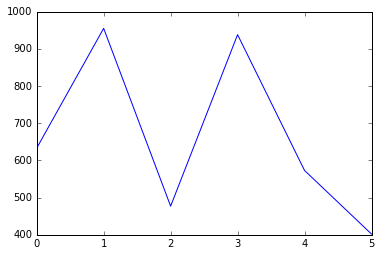

In [37]:
# Create graph
df['Births'].plot()

In [24]:
# Maximum value in the data set
MaxValue = df['Births'].max()
#print(MaxValue)

955


In [29]:
df

,Names,Births
0,Joey,633
1,Chandler,955
2,Monica,477
3,Phoebe,938
4,Ross,573
5,Rachel,402


In [28]:
##Check Row by Row for the condition
df['Births'] == df['Births'].max()
#df['Births'] == MaxValue

0    False
1     True
2    False
3    False
4    False
5    False
Name: Births, dtype: bool

In [16]:
# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

In [20]:
# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

The most popular name


,Names,Births
1,Chandler,955


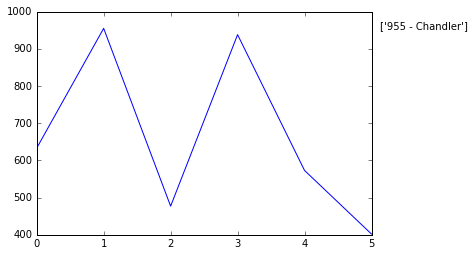

In [34]:
# Create graph
df['Births'].plot()

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
#plt.show()
print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

Lets creat the plot again with **friends' name in x-axis**

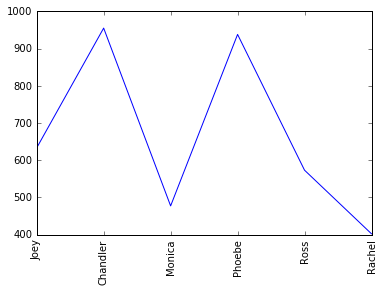

In [40]:
ax = df['Births'].plot()#get the plot object 
ax.set_xticks(df.index)
ax.set_xticklabels(df.Names)
ax.set_xticklabels(df.Names, rotation=90)

<hr style="height:10px;border:none;color:#333;background-color:#333;" />
<hr style="height:10px;border:none;color:#333;background-color:#333;" />